#  Import necessary libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Set plot style for better aesthetics

In [13]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)

# Load the Data using NumPy

In [14]:
try:
    datos_precios = np.loadtxt(
        "manzanas.csv",      
        delimiter=",",       
        skiprows=1,          
        usecols=np.arange(1, 85) 
    )
    print("Data loaded successfully!")
except IOError:
    print("Error: 'manzanas.csv' not found. Please make sure the file is in the same directory.")
    # In case of error, create dummy data to allow the rest of the script to run
    datos_precios = np.random.rand(5, 84) * 100 + 50

Data loaded successfully!


# Initial Data Inspection

In [15]:
# Using the .ndim attribute to see the number of dimensions of our array.
print(f"Number of dimensions: {datos_precios.ndim}")

# Using the .shape attribute to see the form of our array (rows, columns).
print(f"Shape of the array: {datos_precios.shape}")
print("\nThis shows we have data for 5 cities (rows) over 84 months (columns).")

Number of dimensions: 2
Shape of the array: (5, 84)

This shows we have data for 5 cities (rows) over 84 months (columns).


# Transpose the Data for Time-Series Analysis

In [16]:
datos_transpuestos = datos_precios.T
print(f"Shape of transposed array: {datos_transpuestos.shape}")
print("\nNow we have 84 months (rows) and 5 cities (columns).")

Shape of transposed array: (84, 5)

Now we have 84 months (rows) and 5 cities (columns).


# Create a Pandas DataFrame for Enhanced Analysis

In [17]:
# List of cities from the dataset
ciudades = ["Moscow", "St. Petersburg", "Novosibirsk", "Yekaterinburg", "Krasnoyarsk"]

# Create a date range for our 84 months, from 2013-01 to 2019-12
# The dataset description says 2013-2020, but 84 months is exactly 7 years (2013-2019)
fechas = pd.date_range(start="2013-01", periods=84, freq='M')

# Create the DataFrame
df_precios = pd.DataFrame(data=datos_transpuestos, index=fechas, columns=ciudades)

print("DataFrame created successfully. Here are the first 5 rows:")
print(df_precios.head())

C:\Users\apicn\AppData\Local\Temp\ipykernel_70756\1331466928.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start="2013-01", periods=84, freq='M')


DataFrame created successfully. Here are the first 5 rows:
            Moscow  St. Petersburg  Novosibirsk  Yekaterinburg  Krasnoyarsk
2013-01-31   79.72           42.67        62.55          48.26        71.25
2013-02-28   81.08           44.37        62.73          51.01        71.35
2013-03-31   79.68           44.73        63.43          50.91        70.90
2013-04-30   79.80           46.75        63.83          53.94        71.92
2013-05-31   80.63             NaN        66.06          61.27        72.91


# Exploratory Data Analysis - Overall Price Trend

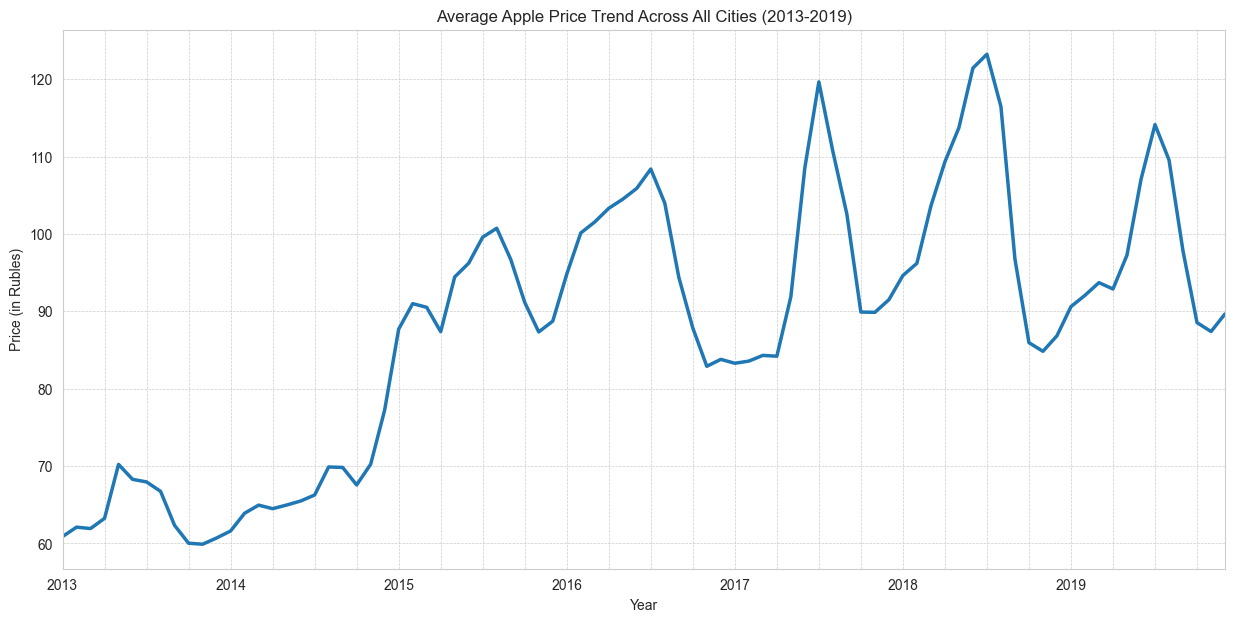

Analysis: The plot shows a clear upward trend in apple prices over the years, with significant seasonal fluctuations.


In [18]:
# Calculating the average price across all cities for each month.
df_precios['Average_Price'] = df_precios.mean(axis=1)

# Plot the average price trend
plt.figure()
df_precios['Average_Price'].plot(
    title='Average Apple Price Trend Across All Cities (2013-2019)',
    linewidth=2.5
)
plt.ylabel('Price (in Rubles)')
plt.xlabel('Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

print("Analysis: The plot shows a clear upward trend in apple prices over the years, with significant seasonal fluctuations.")


# City-by-City Price Comparison

<Figure size 1500x700 with 0 Axes>

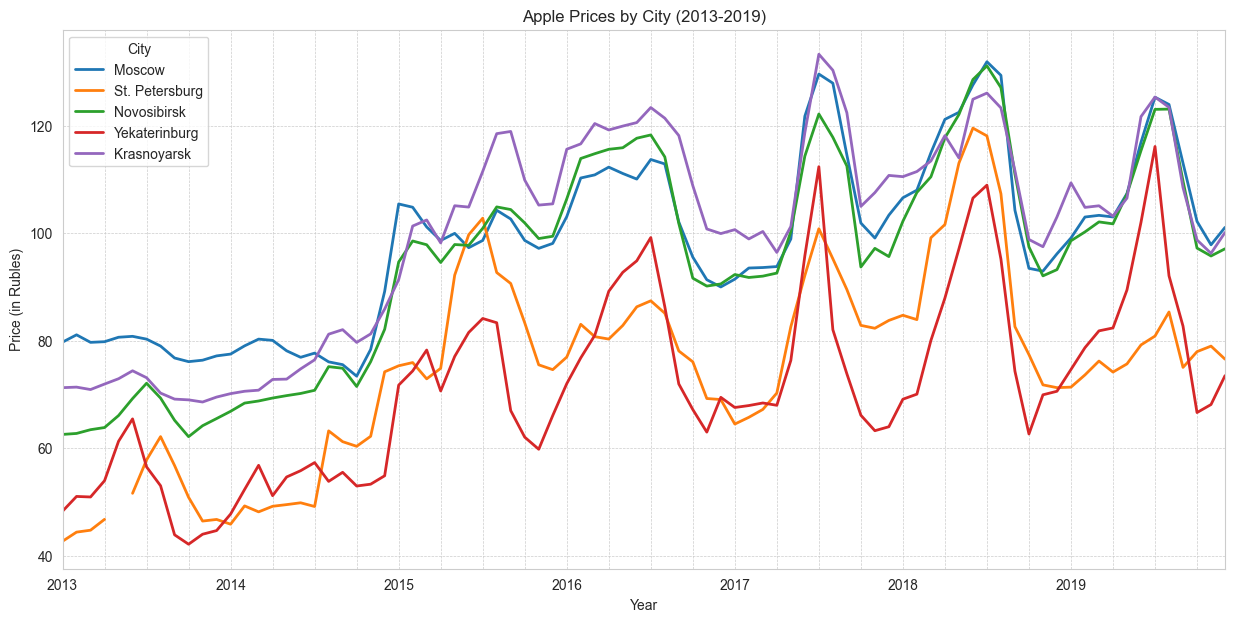

Analysis: All cities follow a similar seasonal pattern, but some cities, like St. Petersburg, consistently have higher prices.


In [19]:
# Plot the price of apples for each city on the same graph.
plt.figure()
df_precios[ciudades].plot(
    title='Apple Prices by City (2013-2019)',
    linewidth=2
)
plt.ylabel('Price (in Rubles)')
plt.xlabel('Year')
plt.legend(title='City')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

print("Analysis: All cities follow a similar seasonal pattern, but some cities, like St. Petersburg, consistently have higher prices.")


# Volatility Analysis

Price Volatility (Standard Deviation) by City:
Novosibirsk       19.216332
Krasnoyarsk       18.905071
St. Petersburg    17.791581
Yekaterinburg     16.860005
Moscow            15.717589
dtype: float64


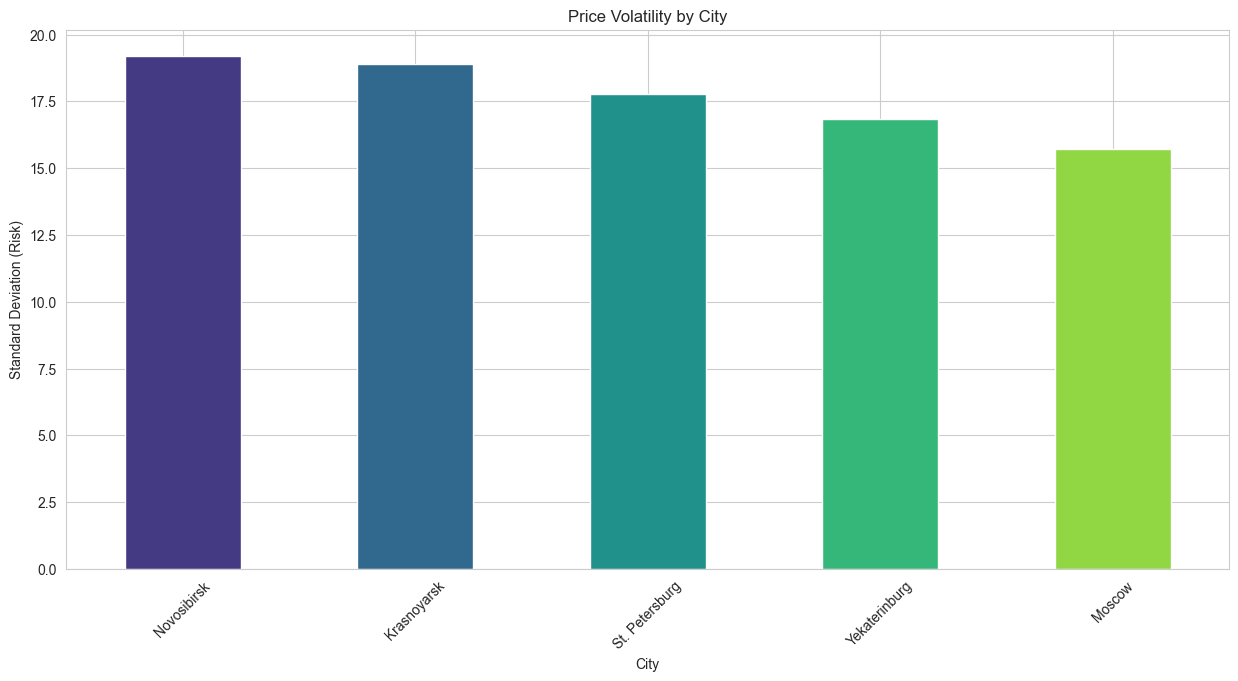


Analysis: Novosibirsk shows the highest volatility, meaning its prices are the most unstable and therefore represent a higher risk. Moscow appears to have the most stable prices.


In [20]:
# In finance, volatility is a measure of risk. We calculate it using the standard deviation.
volatilidad = df_precios[ciudades].std().sort_values(ascending=False)

print("Price Volatility (Standard Deviation) by City:")
print(volatilidad)

# Visualize the volatility
plt.figure()
volatilidad.plot(
    kind='bar',
    color=sns.color_palette("viridis", len(ciudades))
)
plt.title('Price Volatility by City')
plt.ylabel('Standard Deviation (Risk)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()

print("\nAnalysis: Novosibirsk shows the highest volatility, meaning its prices are the most unstable and therefore represent a higher risk. Moscow appears to have the most stable prices.")


# Correlation Analysis


Correlation Matrix:
                  Moscow  St. Petersburg  Novosibirsk  Yekaterinburg  \
Moscow          1.000000        0.875115     0.964654       0.909375   
St. Petersburg  0.875115        1.000000     0.899484       0.804009   
Novosibirsk     0.964654        0.899484     1.000000       0.905558   
Yekaterinburg   0.909375        0.804009     0.905558       1.000000   
Krasnoyarsk     0.928495        0.876570     0.969974       0.858534   

                Krasnoyarsk  
Moscow             0.928495  
St. Petersburg     0.876570  
Novosibirsk        0.969974  
Yekaterinburg      0.858534  
Krasnoyarsk        1.000000  


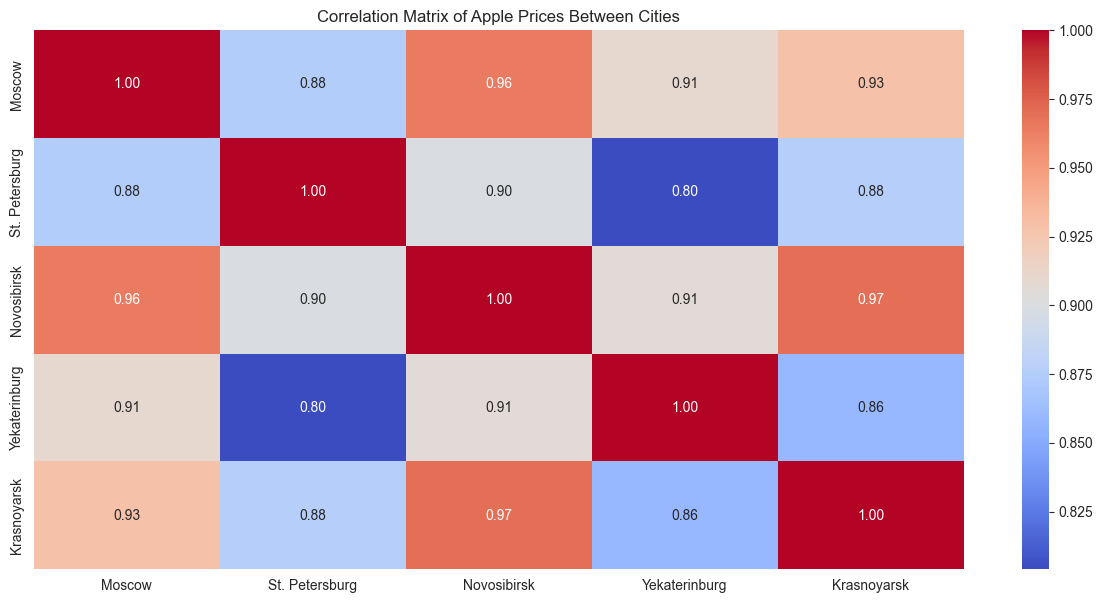


Analysis: The heatmap shows very high correlation (values > 0.9) between all cities. This suggests that the primary drivers of apple prices are national (e.g., inflation, import costs, country-wide harvest success) rather than local factors.


In [21]:
correlacion = df_precios[ciudades].corr()

print("\nCorrelation Matrix:")
print(correlacion)

# Visualize the correlation matrix with a heatmap
plt.figure()
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Apple Prices Between Cities')
plt.show()

print("\nAnalysis: The heatmap shows very high correlation (values > 0.9) between all cities. This suggests that the primary drivers of apple prices are national (e.g., inflation, import costs, country-wide harvest success) rather than local factors.")
